# KMeans

***

O KMeans pertencem à classe de modelos não supervisionados. Modelos não supervisionados não requerem a utilização de classes, ou um alvo específico para aprender padrões. A partir das próprias features no dataset, os padrões são aprendidos.


In [43]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes do modelo
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Visualização

In [44]:
def show_decision_region(x, y, clf, f0, f1, centroids=None):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    plt.title(clf.__class__.__name__)

    if centroids is not None:
        plt.scatter(
            centroids[:, 0],
            centroids[:, 1], 
            c="tab:red", 
            marker="*",
            s=300,
            alpha=1
        )
    plt.show()


In [ ]:
#carregando o csv
dataset = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/Iris.csv")


In [46]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
# Vamos utilizar apenas duas features para facilitar a visualização
feature_0 = "PetalLengthCm"
feature_1 = "PetalWidthCm"

X = dataset.iloc[:,[2,3]]

# Não vamos considerar y, porque o k-means é não supervisionado
# y = dataset.iloc[:,[4]]

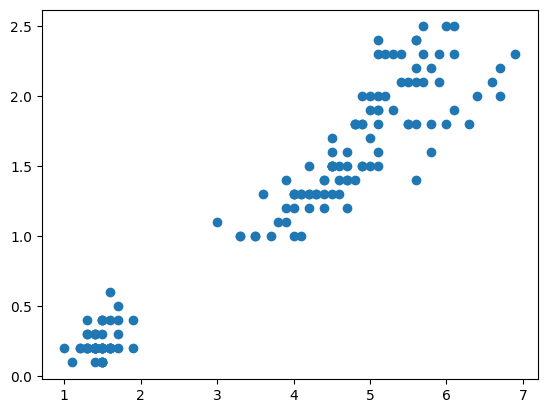

In [48]:
plt.scatter(
    X[feature_0],
    X[feature_1], 
)

## k-means 

O k-Means requer que você informe a quantidade de centróides em que os dados devem ser agrupados. Cada centróides representa o ponto de referência para um cluster. 

Alguns pontos que devem ser observados:

1 - Inicialmente, um centróides pode ser escolhido como uma instância aleatória do dataset, que será atualizado até a variação do ponto durante sua atualização se tornar baixa o suficiente.

     A implementação do _sklearn_ do KMeans possui várias otimizações sobre o algoritmo original. Primeiramente, a escolha inicial dos centróides não é feita de forma puramente aleatória, utiliza o algoritmo k-means++: ao invés de escolher de forma aleatória os centróides inciais, o algoritmo realiza k iterações, onde a probabilidade de escolher um ponto respeita uma função de distribuição não-linear. A cada vez que uma instãncia é escolhida, a probabilidade de escolher uma nova instância próxima às anteriores é menor.

2 - Após os clusters atingirem convergência, o algoritmo termina sua execução.

    Na implementação do _sklearn_ do KMeans o algoritmo é executado várias vezes (10 por padrão), e o resultado com melhor clusterização é utilizado.

## Numero ideal de k (clusters)
Existe algum método para definir a quantidade ideal de agrupamentos?
Existem duas métricas principais que precisamos conhecer ao lidar com o K-Means:

Inércia: A soma das distâncias ao quadrado de todos os pontos de dados até o centróide. Na interpretação do valor da inércia, geralmente, quanto menor a inércia, melhor, pois essa métrica mede o quão próximos os pontos de dados estão de seus centróides.

Silhouette: É uma métrica que indica quanto de sobreposição existe entre os clusters. Em outras palavras, ela calcula a distância de cada cluster em relação aos outros. Essa métrica varia entre -1 e 1, e quanto mais próxima de 1, menor é a sobreposição.

O método cotovelo (Elbow Method) usa a inércia.

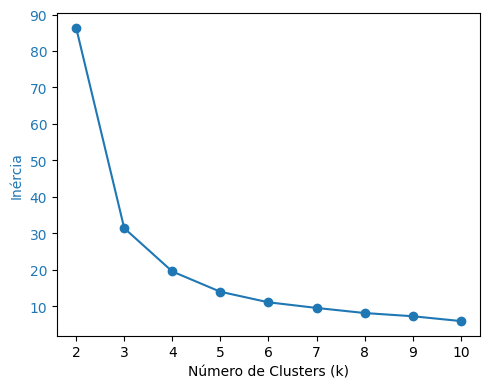

In [49]:
from sklearn.metrics import silhouette_score

# Listas para armazenar os valores de inércia e silhueta para cada k
inertia_values = []
# silhouette_values = []

# Intervalo de valores de k para testar
k_values = range(2, 11)  # Começa em 2 porque silhueta não é definido para k=1

for k in k_values:
    model = KMeans(n_clusters=k, random_state=199)
    model.fit(X)
    
    # Calculando inércia
    inertia_values.append(model.inertia_)
    
    # Calculando coeficiente de silhueta
    # cluster_labels = model.predict(X)
    # silhouette_avg = silhouette_score(X, cluster_labels)
    # silhouette_values.append(silhouette_avg)

fig, ax1 = plt.subplots(figsize=(5, 4))

ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inércia', color='tab:blue')
ax1.plot(k_values, inertia_values, marker='o', color='tab:blue', label='Inércia')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Coeficiente de Silhueta
# ax2 = ax1.twinx()  
# ax2.set_ylabel('Coeficiente de Silhueta', color='tab:orange')
# ax2.plot(k_values, silhouette_values, marker='o', color='tab:orange', label='Silhueta')
# ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.show()

In [50]:
model = KMeans(n_clusters=3, random_state=199)

# No fit pode ser passado o y, mas ele não é usado, presente apenas para consistência da API por convenção.
model.fit(X)
cluster_pred = model.predict(X)

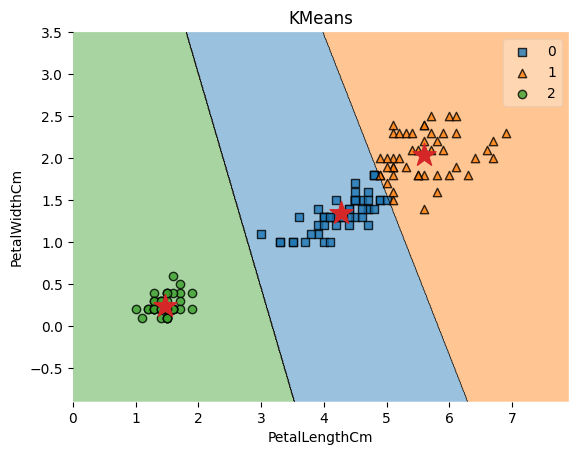

In [51]:
show_decision_region(
    np.array(
        [
            X[feature_0].values, 
            X[feature_1].values,
        ]
    ).T, 
    cluster_pred, 
    model, 
    feature_0, 
    feature_1,
    model.cluster_centers_
)
#**Note que a custerização cria uma região linear!**



## Limitações

No exemplo anterior, observamos que a região criada pelo KMeans é linear. Isso é referente ao KMeans ou ao dataset? Vamos avaliar outro dataset.

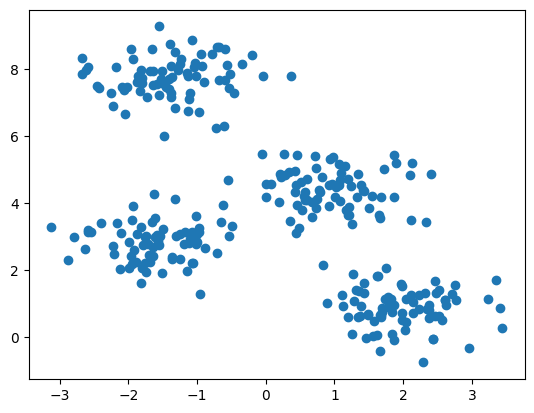

In [52]:
from sklearn.datasets import make_blobs, make_circles

# criação do dataset
X_b, _ = make_blobs(300, 2, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X_b[:, 0], X_b[:, 1])

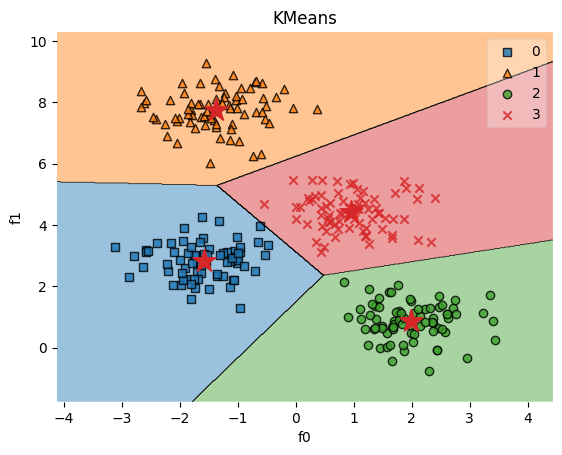

In [53]:
model = KMeans(n_clusters=4)
model.fit(X_b)
cluster_pred_b = model.predict(X_b)

show_decision_region(
    X_b,
    cluster_pred_b,
    model,
    "f0",
    "f1",
    model.cluster_centers_
)

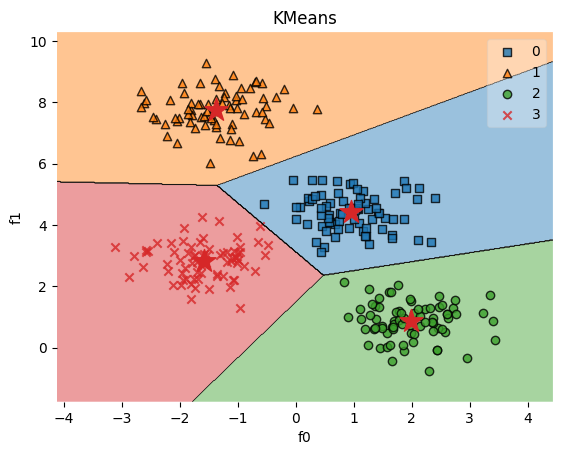

In [54]:
# E se removermos a otimização do k-means 

model = KMeans(n_clusters=4, init="random", n_init=1, random_state=0)
model.fit(X_b)
cluster_pred_b = model.predict(X_b)

show_decision_region(
    X_b,
    cluster_pred_b,
    model,
    "f0",
    "f1",
    model.cluster_centers_
)

### outro exemplo


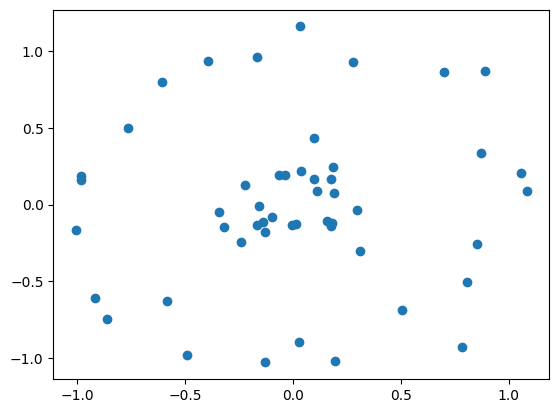

In [55]:
X_c, _ = make_circles(n_samples=50, noise=0.1, random_state=199, factor=0.2)
plt.scatter(X_c[:, 0], X_c[:, 1])

### Esse dataset possui uma não-linearidade, será que o KMeans consegue resolver essa região?

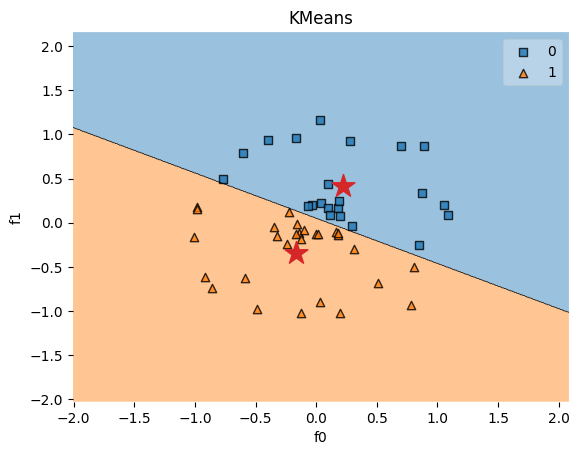

In [56]:
model = KMeans(n_clusters=2)
model.fit(X_c)
cluster_pred_c = model.predict(X_c)

show_decision_region(
    X_c,
    cluster_pred_c,
    model,
    "f0",
    "f1",
    model.cluster_centers_
)


Aqui observamos que KMeans não consegue capturar grupamentos não lineares de forma eficiente. Observe que para atribuir uma instância a um cluster, o KMeans utiliza distância euclidiana, portanto, criando regiões de separação lineares.


Para mais informações:

[_user guide_](https://scikit-learn.org/stable/modules/clustering.html) do _sklearn_.

### Agrupamento Hierárquico
Agrupamento hierárquico é uma alternativa que não requer uma escolha pré-definida de K, e que provê uma saída determinística (sem aleatoriedade)

In [ ]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes do modelo
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
import collections

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#carregando o csv
dataset = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/Iris.csv")
# Vamos utilizar apenas duas features para facilitar a visualização
feature_0 = "PetalLengthCm"
feature_1 = "PetalWidthCm"

X = dataset.iloc[:,[2,3]]

## Definindo o modelo 

[Agglomerative Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).

Mescla recursivamente pares de clusters de dados de amostra; usa a distância de linkage (A dissimilaridade entre dois grupos).

Alguns parâmetros podem ser ajustados: 

'n_clusters': Número de agrupamentos. Pode receber um valor inteiro ou None.

'metric': Métrica usada para calcular o linkage. Métricas usadas:  'euclidean', 'l1', 'l2', 'manhattan', 'cosine', or 'precomputed'. Se 'n_clusters" for None a distância Euclideana será usada.

'linkage': Tipo de linkage usado. Pode ser: ‘ward’, ‘complete’, ‘average’, ‘single’

A documentação possui a descrição dos demais parâmetros.

In [ ]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)
labels = model.labels_
model.get_params()

In [ ]:
collections.Counter(labels)

In [ ]:
plt.scatter(X[feature_0], X[feature_1], c=labels)
plt.show()

### Para visualizar os resultados, pode-se usar um dendograma
# Método para visualização
def plot_dendrogram(model, **kwargs):
    # Primeiramente vamos criar a linkage matriz e então plotar o dendograma

    # criando a contagem the exemplos abaixo de cada nó
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # nó da folha
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot o dendograma correspondente 
    dendrogram(linkage_matrix, **kwargs)

    #o eixo y do dendograma é (proporcional) a distância entre os grupos que foram combinados

In [ ]:
# Alguns parâmetros precisam receber determinados valores para mostrar a árvore completa
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0, compute_full_tree=True)
# n_clusters=None agrupa as instâncias até que reste apenas um único cluster
# ou até que o distance_threshold seja atingido.
# distance_threshold=0 - continua a aglomeração até que todos os pontos sejam agrupados em um único cluster

model = model.fit(X)
plt.figure(figsize=(10, 6))
plt.title("Dendograma")

# Plotando o top 3 níveis do dendograma
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Número de pontos no nó")
#plt.axhline(y=10, color='red')
plt.show()